In [543]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import random

In [87]:
x = np.linspace(0.1, 7*np.pi, 200)
def fce(x):
    f= 15* np.arctan(x) * np.cos(x) * 18* np.log(x)
    return f

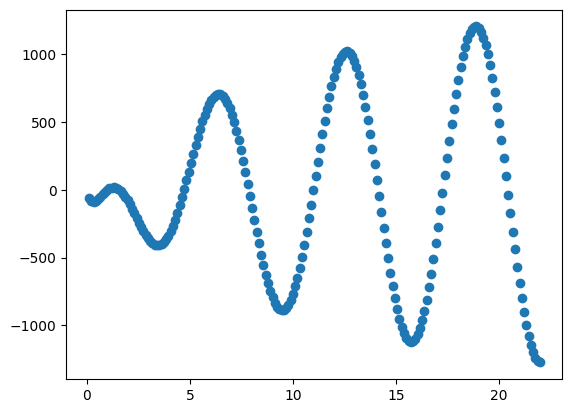

In [88]:
y = fce(x)
plt.scatter(x, y)

In [109]:
poloha= random.uniform(min(x),max(x))
vysledek = fce(poloha)
for i in range(50000):
    posunuti = random.uniform(-0.1,0.1)
    min_hledany = fce(poloha + posunuti)
    
    if min_hledany > vysledek:
        vysledek = min_hledany
        poloha = poloha + posunuti

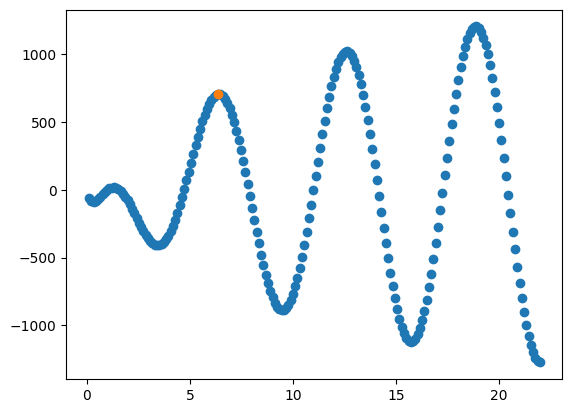

In [110]:
plt.scatter(x,y)
plt.scatter(poloha,vysledek)

zigani - horolozec s pouzitim metropolisuvu algoritmu
?horolozec po kazde nahodne generovani x, metropolis  - potomrk je soused, ohrivani a ohlazeni ma vliv na pravdepodobnost

v prubehu oh;azujeme system, a pravdepodobnost toho ze bude vybran ten hori potomek klesa(blizi se k nule)

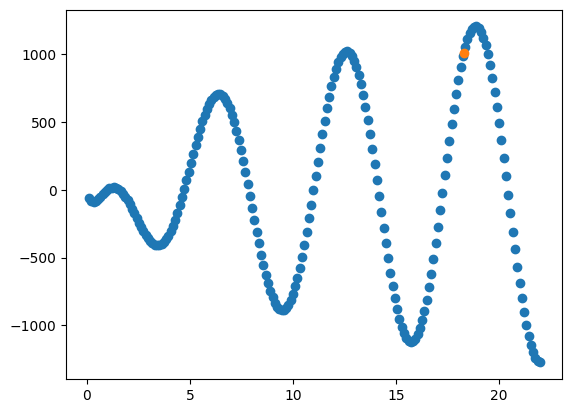

In [165]:
teploty = np.linspace(2, 0.5, 100)

poloha= random.uniform(min(x),max(x))
vysledny_y = fce(poloha)
for teplota in teploty:
    for i in range(500):
        posunuti = random.uniform(-0.1,0.1)
        polohovy_y = fce(poloha)
        posunuty_y = fce(poloha + posunuti)
        
        if poloha+posunuti < max(x) and poloha+posunuti > min(x):
            if posunuty_y > vysledny_y:
                vysledny_y = posunuty_y
                poloha = poloha + posunuti
            elif(random.random() < math.exp(-(posunuty_y - polohovy_y)/teplota)):
                vysledny_y = posunuty_y
                poloha = poloha + posunuti
        
plt.scatter(x,y)
vysledek = fce(poloha)
plt.scatter(poloha,vysledek)

A

In [178]:
dd = pd.read_csv("dist.csv")

#### jls

In [242]:
dd.head()

,A,B,C,D,E
A,0,10,20,40,60
B,10,0,30,50,10
C,20,30,0,60,20
D,40,50,60,0,30
E,60,10,20,30,0


In [185]:
print(dd["A"]["B"])

10


cas mezi bodem A a B

In [205]:
seznam_mest = dd.columns
dd[seznam_mest[0]][seznam_mest[1]]
cas = 0
i=0
for i in range(len(seznam_mest)-1):
    cas += dd[seznam_mest[i]][seznam_mest[i+1]]
    i+=1
cas

130

pokus o generovani nahodne cesty

In [233]:
seznam = list(dd.columns)
generovany_seznam_mest = []
for i in range (len(seznam)):
    mesto = random.choice(seznam) 
    generovany_seznam_mest.append(mesto)
    seznam.remove(mesto)

['C', 'B', 'A', 'D', 'E']

f-ce pro generovani nohodneho cisla pro zvoleni z cesty

In [333]:
import random
def nah(seznam):
    nahodne_cislo = random.randint(0, len(seznam) - 1)
    return nahodne_cislo

In [381]:
def spocitat_cas_casty(tabulka, seznam_mest_generovanych):
    cas = 0
    i=0
    for i in range(len(seznam_mest_generovanych)-1):
        cas += tabulka[seznam_mest_generovanych[i]][seznam_mest_generovanych[i+1]]
    return cas

In [446]:
def hledani_nejlepsi_cesty(puvodni_tabulka):
    seznam = list(puvodni_tabulka.columns)
    seznam_pro_vytvoreni_prvniho_uzlu = seznam.copy()
    generovany_seznam_mest = []
    ulozene_data_casu = []

    for i in range (len(seznam)):
        mesto = random.choice(seznam_pro_vytvoreni_prvniho_uzlu) 
        generovany_seznam_mest.append(mesto)
        seznam_pro_vytvoreni_prvniho_uzlu.remove(mesto)
    puvodni_trasa = generovany_seznam_mest.copy()

    pocatecni_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)
    ulozene_data_casu.append(pocatecni_cas)


    teploty = np.linspace(2, 0.5, 50)

    for teplota in teploty:
        for krok in range(300):
            seznam_copy = seznam.copy()
            a = nah(seznam)
            seznam_copy.remove(seznam_copy[a])
            b = nah(seznam_copy)
            novy_generovany_seznam = generovany_seznam_mest.copy()
            novy_generovany_seznam[a], novy_generovany_seznam[b] = novy_generovany_seznam[b], novy_generovany_seznam[a]
            
            novy_cas = spocitat_cas_casty(puvodni_tabulka, novy_generovany_seznam)
            stary_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)
            
            if (novy_cas < stary_cas):
                generovany_seznam_mest = novy_generovany_seznam.copy()
                stary_cas = novy_cas

            elif(random.random() < math.exp(-(stary_cas - novy_cas)/teplota)):
                    generovany_seznam_mest = novy_generovany_seznam.copy()
                    stary_cas = novy_cas
                    
            if stary_cas < ulozene_data_casu[-1]:
                ulozene_data_casu.append(stary_cas)
            else:
                ulozene_data_casu.append(ulozene_data_casu[-1])

    return ulozene_data_casu, generovany_seznam_mest, puvodni_trasa


In [448]:
ulozene_data_casu, nejlesi_trasa, pocatecni_trasa = hledani_nejlepsi_cesty(dd)

iterace = np.linspace(1, len(ulozene_data_casu), len(ulozene_data_casu))

In [450]:
generovany_seznam_mest
pocatecni_trasa

['E', 'A', 'C', 'D', 'B']

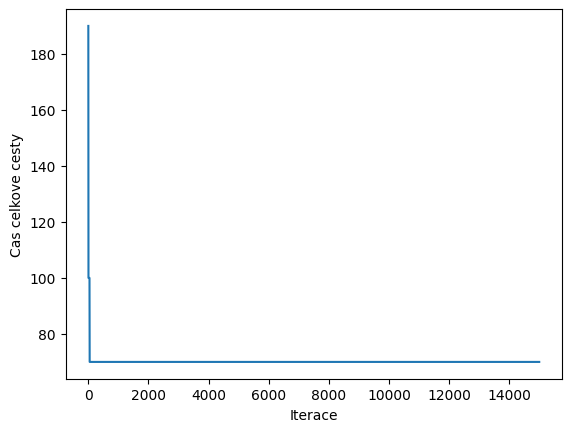

In [495]:
plt.plot(iterace, ulozene_data_casu)
plt.xlabel("Iterace")
plt.ylabel("Cas celkove cesty")
plt.show();

In [455]:
puvodnni_cas = spocitat_cas_casty(dd,pocatecni_trasa)

procenta = []
for i in range(0,len(ulozene_data_casu)):
    procenta.append(ulozene_data_casu[i] / puvodnni_cas * 100)

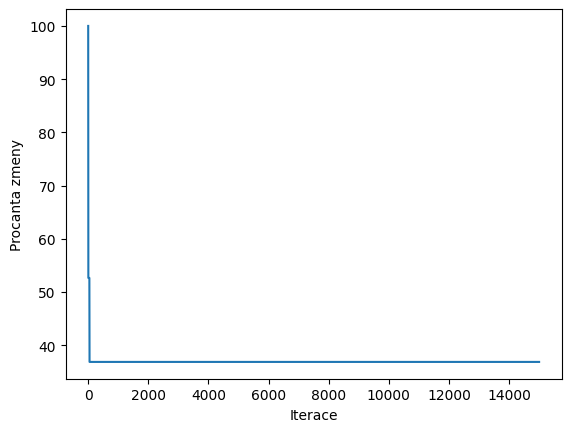

In [494]:
plt.plot(iterace, procenta)
plt.xlabel("Iterace")
plt.ylabel("Procanta zmeny")
plt.show();

# Zpracovani ulohy

In [481]:
mesta = pd.read_csv("cz.csv", usecols=['mesto', 'sirka', 'vyska'], nrows= 80)

In [482]:
mesta.head()

,mesto,sirka,vyska
0,Prague,50.0875,14.4214
1,Olomouc,49.5939,17.2508
2,Brno,49.1925,16.6083
3,Ostrava,49.8356,18.2925
4,Plzeň,49.7475,13.3775


In [483]:
len(mesta["mesto"])

80

In [484]:
import routingpy as rp
coordinaty = mesta[['vyska', 'sirka']].values
nazvy = mesta['mesto'].values

In [486]:
api_key = "ecaeaee9-a6f1-46f4-a531-10c6eeea1fb0"
api = rp.Graphhopper(api_key=api_key)
matrix = api.matrix(locations=coordinaty, profile='car')
durations = np.matrix(matrix.durations)
print(durations)

[[    0 10191  7395 ... 12959  6261  7836]
 [10265     0  3294 ...  4105 14656 11987]
 [ 7179  3204     0 ...  6421 12157  9488]
 ...
 [12932  4033  6548 ...     0 17909 15240]
 [ 6296 14644 12297 ... 17860     0 12578]
 [ 7836 12005  9658 ... 15221 12633     0]]


In [487]:
vazdalonost_copy = durations.copy()

In [558]:
tabulka = pd.DataFrame(vazdalonost_copy, columns=nazvy, index=nazvy)
tabulka/= (60*60) # hodiny 

In [559]:
tabulka.to_csv("Tabulka_vzdalenosti_mezi_mesty.csv")

In [560]:
tabulka.head()

,Prague,Olomouc,Brno,Ostrava,Plzeň,Liberec,České Budějovice,Hradec Králové,Ústí nad Labem,Pardubice,...,Rakovník,Dvůr Králové nad Labem,Varnsdorf,Nymburk,Poděbrady,Turnov,Rokycany,Hlučín,Chodov,Český Krumlov
Prague,0.000000,2.830833,2.054167,3.553611,1.133333,1.207500,1.729167,1.302778,0.961667,1.388333,...,0.881389,1.567222,1.786944,0.864444,0.762500,1.003056,0.949167,3.599722,1.739167,2.176667
Olomouc,2.851389,0.000000,0.915000,1.094167,3.405833,3.150556,2.882222,1.883889,3.333333,1.847500,...,3.213056,2.220833,3.802778,2.321389,2.198611,2.853056,3.221667,1.140278,4.071111,3.329722
Brno,1.994167,0.890000,0.000000,1.737500,2.711667,2.834444,2.188056,2.238056,2.776389,2.044167,...,2.518889,2.574722,3.517500,2.281389,2.158611,2.630000,2.527500,1.783611,3.376944,2.635556
Ostrava,3.520278,1.048333,1.746944,0.000000,4.237500,4.055000,3.714167,2.788333,4.237778,2.751667,...,4.044722,3.125278,4.354444,3.225833,3.103056,3.757500,4.053333,0.276944,4.902778,4.161389
Plzeň,1.142222,3.395000,2.743056,4.242222,0.000000,2.126111,1.982222,2.153889,1.847778,2.239444,...,1.137500,2.418333,2.671111,1.715556,1.613889,1.921667,0.309444,4.288333,1.327222,2.320278


In [499]:
nazvy_mest = list(tabulka.columns)
nazvy_mest_pro_vytvoreni_prvni_trasy = nazvy_mest.copy()
prvni_nahodne_sgenerovana_trasa = []

for i in range(len(nazvy_mest)):
    mesto = random.choice(nazvy_mest_pro_vytvoreni_prvni_trasy)
    prvni_nahodne_sgenerovana_trasa.append(mesto)
    nazvy_mest_pro_vytvoreni_prvni_trasy.remove(mesto)

In [501]:
print(prvni_nahodne_sgenerovana_trasa)
len(prvni_nahodne_sgenerovana_trasa)

['Prostějov', 'Chodov', 'Slaný', 'Líšeň', 'Nymburk', 'Ostrava', 'Karviná', 'Náchod', 'Jirkov', 'Neratovice', 'Kolín', 'Varnsdorf', 'Liberec', 'Chomutov', 'Kroměříž', 'Žďár nad Sázavou', 'Louny', 'Nový Jičín', 'Znojmo', 'Kladno', 'Říčany', 'Jablonec nad Nisou', 'Hlučín', 'Orlová', 'Sokolov', 'Prague', 'Zlín', 'Český Těšín', 'Česká Lípa', 'Třebíč', 'Krnov', 'Jičín', 'Přerov', 'Brandýs nad Labem-Stará Boleslav', 'Frýdek-Místek', 'Jihlava', 'Vsetín', 'Pardubice', 'Teplice', 'Rakovník', 'Olomouc', 'Valašské Meziříčí', 'Mladá Boleslav', 'Tábor', 'Rokycany', 'Bílina', 'Hradec Králové', 'Bohumín', 'Blansko', 'Mělník', 'Litvínov', 'Uherské Hradiště', 'Turnov', 'Dvůr Králové nad Labem', 'Strakonice', 'Most', 'Poděbrady', 'Bystrc', 'Písek', 'Brno', 'Příbram', 'Šumperk', 'Ústí nad Labem', 'Opava', 'Žatec', 'Litoměřice', 'Kopřivnice', 'Plzeň', 'Svitavy', 'Otrokovice', 'Havířov', 'Český Krumlov', 'Bruntál', 'Kralupy nad Vltavou', 'Chrudim', 'Karlovy Vary', 'Kutná Hora', 'Beroun', 'Břevnov', 'České B

80

In [570]:
def generovani_souradnic(trasa):
    souradnice_mest_trasy = []
    for i in range(len(trasa)):
        radek = mesta.loc[mesta["mesto"] == trasa[i]]
        radek = radek[['vyska', 'sirka']].values[0]
        souradnice_mest_trasy.append(radek)
    return souradnice_mest_trasy

In [575]:
souradnice_mest_trasy_pocatecni = generovani_souradnic(prvni_nahodne_sgenerovana_trasa)
print(prvni_nahodne_sgenerovana_trasa)

['Prostějov', 'Chodov', 'Slaný', 'Líšeň', 'Nymburk', 'Ostrava', 'Karviná', 'Náchod', 'Jirkov', 'Neratovice', 'Kolín', 'Varnsdorf', 'Liberec', 'Chomutov', 'Kroměříž', 'Žďár nad Sázavou', 'Louny', 'Nový Jičín', 'Znojmo', 'Kladno', 'Říčany', 'Jablonec nad Nisou', 'Hlučín', 'Orlová', 'Sokolov', 'Prague', 'Zlín', 'Český Těšín', 'Česká Lípa', 'Třebíč', 'Krnov', 'Jičín', 'Přerov', 'Brandýs nad Labem-Stará Boleslav', 'Frýdek-Místek', 'Jihlava', 'Vsetín', 'Pardubice', 'Teplice', 'Rakovník', 'Olomouc', 'Valašské Meziříčí', 'Mladá Boleslav', 'Tábor', 'Rokycany', 'Bílina', 'Hradec Králové', 'Bohumín', 'Blansko', 'Mělník', 'Litvínov', 'Uherské Hradiště', 'Turnov', 'Dvůr Králové nad Labem', 'Strakonice', 'Most', 'Poděbrady', 'Bystrc', 'Písek', 'Brno', 'Příbram', 'Šumperk', 'Ústí nad Labem', 'Opava', 'Žatec', 'Litoměřice', 'Kopřivnice', 'Plzeň', 'Svitavy', 'Otrokovice', 'Havířov', 'Český Krumlov', 'Bruntál', 'Kralupy nad Vltavou', 'Chrudim', 'Karlovy Vary', 'Kutná Hora', 'Beroun', 'Břevnov', 'České B

In [535]:
import folium
def generate_map(coordinates, names, directions):
    # folium needs lat, long
    coordinates = [(y, x) for (x, y) in coordinates]
    route_points = [(y, x) for (x, y) in directions]
    lat_centre = np.mean([x for (x, y) in coordinates])
    lon_centre = np.mean([y for (x, y) in coordinates])
    centre = lat_centre, lon_centre
    
    m = folium.Map(location=centre, zoom_start=1, zoom_control=False)
    
    # plot the route line
    folium.PolyLine(route_points, color='red', weight=2).add_to(m)
    
    # plot each point with a hover tooltip
    for i, (point, name) in enumerate(zip(coordinates, names)):
        folium.CircleMarker(location=point, tooltip=f'{i}: {name}', radius=2).add_to(m)
        
    custom_tile_layer = folium.TileLayer(
        tiles='http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png',
        attr='CartoDB Positron',
        name='Positron',
        overlay=True,
        control=True,
        opacity=0.7 # Adjust opacity to control the level of greying out
        )
    custom_tile_layer.add_to(m)
    folium.LayerControl().add_to(m)
    
    sw = (np.min([x for (x, y) in coordinates]), np.min([y for (x, y) in coordinates]))
    ne = (np.max([x for (x, y) in coordinates]), np.max([y for (x, y) in coordinates]))
    m.fit_bounds([sw, ne])
    
    return m

In [577]:
generate_map(coordinaty, nazvy, souradnice_mest_trasy_pocatecni).save('pocatecni_trasa.html')

In [541]:
import random
def nah(seznam):
    nahodne_cislo = random.randint(0, len(seznam) - 1)
    return nahodne_cislo

def spocitat_cas_casty(tabulka, seznam_mest_generovanych):
    cas = 0
    i=0
    for i in range(len(seznam_mest_generovanych)-1):
        cas += tabulka[seznam_mest_generovanych[i]][seznam_mest_generovanych[i+1]]
    return cas

In [609]:
def hledani_nejlepsi_cesty(puvodni_tabulka):
    seznam = list(puvodni_tabulka.columns)
    seznam_pro_vytvoreni_prvniho_uzlu = seznam.copy()
    generovany_seznam_mest = []
    ulozene_data_casu = []

    for i in range (len(seznam)):
        mesto = random.choice(seznam_pro_vytvoreni_prvniho_uzlu) 
        generovany_seznam_mest.append(mesto)
        seznam_pro_vytvoreni_prvniho_uzlu.remove(mesto)
    puvodni_trasa = generovany_seznam_mest.copy()

    pocatecni_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)
    ulozene_data_casu.append(pocatecni_cas)


    teploty = np.linspace(3, 0.5, 1000)

    for teplota in teploty:
        for krok in range(3000):
            seznam_copy = seznam.copy()
            a = nah(seznam)
            seznam_copy.remove(seznam_copy[a])
            b = nah(seznam_copy)
            novy_generovany_seznam = generovany_seznam_mest.copy()
            novy_generovany_seznam[a], novy_generovany_seznam[b] = novy_generovany_seznam[b], novy_generovany_seznam[a]
            
            novy_cas = spocitat_cas_casty(puvodni_tabulka, novy_generovany_seznam)
            stary_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)

            if (novy_cas < stary_cas):
                generovany_seznam_mest = novy_generovany_seznam.copy()
                stary_cas = novy_cas
                

            elif(random.random() < math.exp(-(stary_cas - novy_cas)/teplota)):
                    generovany_seznam_mest = novy_generovany_seznam.copy()
                    stary_cas = novy_cas
                    
            if stary_cas < ulozene_data_casu[-1]:
                ulozene_data_casu.append(stary_cas)
            else:
                ulozene_data_casu.append(ulozene_data_casu[-1])

    return ulozene_data_casu, generovany_seznam_mest, puvodni_trasa


In [610]:
ulozene_data_casu, nejlesi_trasa, pocatecni_trasa = hledani_nejlepsi_cesty(tabulka)

iterace = np.linspace(1, len(ulozene_data_casu), len(ulozene_data_casu))

In [ ]:
generovany_seznam_mest
pocatecni_trasa

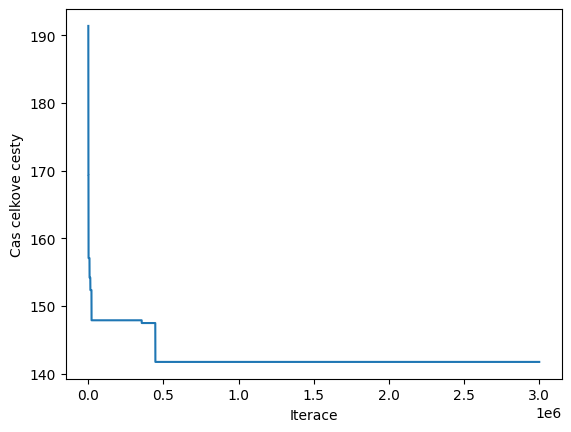

In [611]:
plt.plot(iterace, ulozene_data_casu)
plt.xlabel("Iterace")
plt.ylabel("Cas celkove cesty")
plt.show();

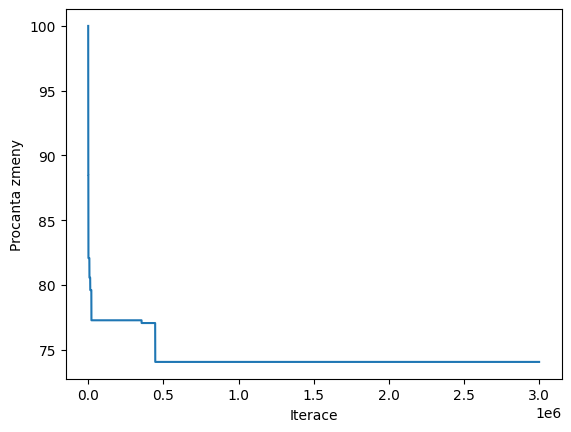

In [612]:
puvodnni_cas = spocitat_cas_casty(tabulka,pocatecni_trasa)

procenta = []
for i in range(0,len(ulozene_data_casu)):
    procenta.append(ulozene_data_casu[i] / puvodnni_cas * 100)

plt.plot(iterace, procenta)
plt.xlabel("Iterace")
plt.ylabel("Procanta zmeny")
plt.show();

In [ ]:
souradnice_mest_trasy_nejlepsi = generovani_souradnic(nejlesi_trasa)

generate_map(coordinaty, nazvy, souradnice_mest_trasy_nejlepsi).save('nejlepsi_trasa.html')

In [616]:
souradnice_mest_trasy_poca = generovani_souradnic(pocatecni_trasa)

generate_map(coordinaty, nazvy, souradnice_mest_trasy_poca).save('pocatecni_trasa.html')